#### Paris Physics Master Numerical Methods -- Exercises Lecture 4

- Name: SHASHWAT SINGH
- Name: SAMERAN BANERJEE

Import modules and anything else you need

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Deterministic methods of numerical integration

### Simple qudrature rules

In this exercise we are going to implement and investigate the errors of the integration rules seen in class.

We will calculate the integral of the function:
    $$ f(x) = x^2 \exp{(-x^2)}   $$
over the intervals $[0,1]$ and $[0,3]$

In terms of the error function the integral above is given by:
$$ \int_0^x f(x')dx' = \frac{1}{4} \left(\sqrt{\pi } \;\text{erf}(x)-2 e^{-x^2} x\right) $$
  
the numerical values of the integral for the two intervals are (as  calculated using `MATHEMATICA`)
$$0.1894723458204922$$ and $$0.4429185594236305$$



Let's begin by defining the function
$$ f(x) = x^2 \exp{(-x^2)}$$
and a function to calculate the abolute error
```python
def abs_error(numerical_value, actual_value):
    ...   
    return ...
```

In [7]:
f = lambda x : x**2*np.exp(-x**2)

def abs_error(numerical_value, actual_value):  
    return abs(numerical_value - actual_value)

Plot the function $f(x)$ over the interval $[0,4]$ and label the axes

Text(0, 0.5, '$f(x) = x^2 \\exp{(-x^2)}$')

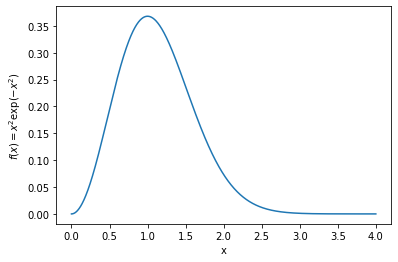

In [3]:
x = np.linspace(0,4,1000)
plt.plot(x, f(x))
plt.xlabel('x')
plt.ylabel('$f(x) = x^2 \exp{(-x^2)}$')

Implement the left, right, mid-point, trapezoidal and Simpson's rules and test them on a simple, analytical integral

In [4]:
x = np.linspace(0,3,1000)
h = (x[-1] - x[0])/len(x)
L = lambda x: h * np.sum(f(x[:-1]))
R = lambda x: h * np.sum(f(x[1:]))
M = lambda x: h * np.sum(f((x[:-1] + x[1:]) / 2))
T = lambda x: h * ((f(x[0]) + f(x[-1])) / 2 + np.sum(f(x[1:-1])))
S = lambda x: (2*M(x) + T(x)) / 3
#(h / 3.) * (f(x[0]) + 4*f((x[0] + x[-1]) / 2) + f(x[-1]))

In [5]:
L(x)

0.4424739703846662

In [6]:
R(x)

0.44247730244937655

In [7]:
M(x)

0.44247564308779436

In [8]:
T(x)

0.44247563641702137

In [9]:
S(x)

0.4424756408642034

For each of the five rules, calculate the integral of the function:
    $$ f(x) = x^2 \exp{(-x^2)}   $$
over the interval $[0,1]$ and $[0,3]$ with 100 sub-intervals

Calculate the absolute errors and comment the results

In [10]:
if __name__ == "__main__":
    d1_abs = 0.1894723458204922
    d2_abs = 0.4429185594236305
    x1 = np.linspace(0,1,100)
    x2 = np.linspace(0,3,100)

    print("Errors for range [0,1]\n left:{} \n right:{} \n mid-point:{} \n trapezoidal:{} \n \
Simpson's rules:{}\n\n".format(
        abs_error(d1_abs,L(x1)), 
        abs_error(d1_abs,R(x1)), 
        abs_error(d1_abs,M(x1)),
        abs_error(d1_abs,T(x1)),
        abs_error(d1_abs,S(x1))
        ))
    
    print("Errors for range [0,3]\n left:{} \n right:{} \n mid-point:{} \n trapezoidal:{} \n \
Simpson's rules:{}".format(
        abs_error(d2_abs,L(x2)), 
        abs_error(d2_abs,R(x2)), 
        abs_error(d2_abs,M(x2)),
        abs_error(d2_abs,T(x2)),
        abs_error(d2_abs,S(x2))
        ))

Errors for range [0,1]
 left:0.13375087827988255 
 right:0.13264723995636823 
 mid-point:0.13319905910627639 
 trapezoidal:0.1331990591181254 
 Simpson's rules:0.13319905911022606


Errors for range [0,3]
 left:0.3990713329344041 
 right:0.3990680008696938 
 mid-point:0.3990695996156122 
 trapezoidal:0.399069666902049 
 Simpson's rules:0.3990696220444245


We are now going to focus on the integration interval $[0,3]$ and compare the absolute error of the 5 rules for an increasing number of sub-intervals $n$ (go up to $n=10000$).

Plot your results (error versus number of sub-intervals) and comment.

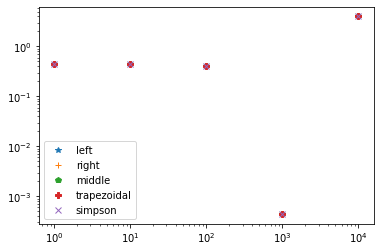

In [11]:
if __name__ == "__main__":
    d2_abs = 0.4429185594236305
    err_l, err_r, err_m, err_t,err_s = [], [], [], [], []
    N = [1, 10, 100, 1000, 10000]
    for n in N:
        x = np.linspace(0,3,n)
        err_l.append(abs_error(d2_abs,L(x)))
        err_r.append(abs_error(d2_abs,R(x)))
        err_m.append(abs_error(d2_abs,M(x)))
        err_t.append(abs_error(d2_abs,T(x)))
        err_s.append(abs_error(d2_abs,S(x)))

    plt.loglog(N,err_l, marker='*', linewidth=0.0, label='left')
    plt.loglog(N,err_r, marker='+', linewidth=0.0, label='right')
    plt.loglog(N,err_m, marker='p', linewidth=0.0, label='middle')
    plt.loglog(N,err_t, marker='P', linewidth=0.0, label='trapezoidal')
    plt.loglog(N,err_s, marker='x', linewidth=0.0, label='simpson')
    plt.legend()

It is expected that the error depends on the number of sub-intervals $n$ as
    $$ \epsilon \propto \frac{1}{n^\alpha} $$

Using linear regression, determine the value of $\alpha$ for each of the rules.

Comment your work and results, and do not forget to label your plots.

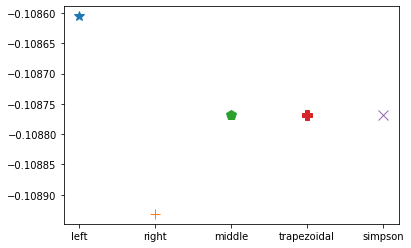

In [12]:
def lin_reg(x_data, y_data):
    
    x_ = np.average(x_data)
    y_ = np.average(y_data)
    s1 = np.sum(x_data*y_data) - len(x_data)*x_*y_
    s2 = np.sum(x_data**2) - len(x_data)*x_**2

    a1 = s1/s2
    a0 = y_ - a1*x_
    
    return a1

if __name__ == "__main__":
    d2_abs = 0.4429185594236305
    err_l, err_r, err_m, err_t,err_s = [], [], [], [], []
    N = [1, 10, 100, 1000, 10000]
    for n in N:
        x = np.linspace(0,3,n)

        err_l.append(abs_error(d2_abs,L(x)))
        err_r.append(abs_error(d2_abs,R(x)))
        err_m.append(abs_error(d2_abs,M(x)))
        err_t.append(abs_error(d2_abs,T(x)))
        err_s.append(abs_error(d2_abs,S(x)))
    
    plt.plot(1, lin_reg(np.log(N), np.log(err_l)), marker='*', markersize=10)
    plt.plot(2, lin_reg(np.log(N), np.log(err_r)), marker='+', markersize=10)
    plt.plot(3, lin_reg(np.log(N), np.log(err_m)), marker='p', markersize=10)
    plt.plot(4, lin_reg(np.log(N), np.log(err_t)), marker='P', markersize=10)
    plt.plot(5, lin_reg(np.log(N), np.log(err_s)), marker='x', markersize=10)
    plt.xticks([1,2,3,4,5],['left','right','middle','trapezoidal','simpson'])


## Improper integrals

Integrate the improper integral  for $x = 1$
$$ \int_{-\infty}^x \frac{1}{\sqrt{2 \pi}} \exp{(-x^2/2)} \; dx  $$


In [13]:
f = lambda x: 1 / np.sqrt((2*np.pi)) * np.exp(-x**2/2)

## Monte Carlo Integration

In this exercise you are going to:

- implement a Monte Carlo integration routine 
- find the integral of $f(x)=x^2$ over the interval $[-2,2]$ 
- study the dependence of the absolute error on the number of samples.

Define the function $f(x)$ and a function `montecarlo` that returns the integral.

```python
def montecarlo(f,a,b,n):
    """f is function to integrate over the interval [a,b] with n random points"""
    ...
    ...
    return I
```

In [10]:
f = lambda x : x**2

def montecarlo(f,a,b,n):
    _f_ = 1. / n * np.sum(f(x))
    I = (b - a) * _f_
    return I

Calculate the integral and the absolute error, do the same integral with one of the methods you developed earlier. Compare and comment your results.

In [11]:
x = np.linspace(-2, 2, 1000)
I = montecarlo(f, x[0], x[-1], len(x))
print(I)

5.344010677344011


In [12]:
h = (x[-1] - x[0])/len(x)
L = lambda x: h * np.sum(f(x[:-1]))
L(x)

5.32801067734401

Study the dependence of the absolute error on the number of random samples $n$ with $n=10\dots10^4$

- For each value of $n$ calculate the integral $N=100$ times and take the mean value $\left< I(n)\right>$.
- Calculate the absolute error with respect to this mean, plot it as a function of $n$.
- Fit the data and remember that the error is expected to be
    $$E \sim \frac{1}{\sqrt{n}}$$
    
- For $N=1000$ and $n=1000$, plot the probability distribution function of $\left< I(n)\right>$. Comment. 

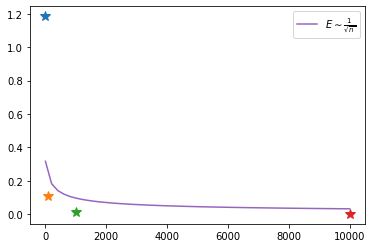

In [28]:
n = [10, 100, 1000, 10000]
f_abs = 16./3
err = []
for i in n:
    x = np.linspace(-2, 2, i)
    I = []
    for _ in range(100):
        I.append(montecarlo(f, x[0], x[-1], len(x)))
    _I_ = np.mean(I)
    err.append(abs_error(_I_, f_abs))
err = np.array(err)
plt.plot(n[0], err[0], marker='*', markersize=10)
plt.plot(n[1], err[1], marker='*', markersize=10)
plt.plot(n[2], err[2], marker='*', markersize=10)
plt.plot(n[3], err[3], marker='*', markersize=10)

plt.plot(np.linspace(10,10000), 1/np.sqrt(np.linspace(10,1000)), 
         label="$E \sim \\frac{1}{\\sqrt{n}}$")
plt.legend()

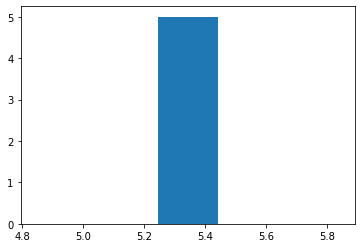

In [62]:
from scipy.stats import norm
x = np.linspace(-2, 2, 1000)
I = []
for _ in range(1000):
    I.append(montecarlo(f, x[0], x[-1], len(x)))
_I_ = np.mean(I)
std = np.sqrt(np.var(I))
y = ((1 / (np.sqrt(2 * np.pi) * std)) * np.exp(-0.5 * (1 / std * (5 - _I_))**2))
plt.hist(_I_, 5, density=True)
plt.plot(5, y)
plt.show()